# <center><font color='cyan'>MY 2024-25 SCIENCE FAIR NOTEBOOK</font></center>
## <center><font color='yellow'>MY QUESTION</font></center>
### <center><font color='yellow'>Can a Data Science Approach<br>Offer Additional Insights<br>to the nearly<br>90,000 UFO Sightings<br>in the United States ?</font></center>

# <center> [Thomas Edison and His Papers](https://edison.rutgers.edu/about/thomas-edison-and-his-papers) </center>

## <center> Thomas Edison Created Approximately<br> 3,500 notebooks ...<br>around 285 pages each ...<br>5 million words ...<br>Thousands of sketches ...<br>His notebooks<br>were filled with a variety of content:<br>including diagrams ...<br>calculations ...<br>lists ...<br>sketches ...<br>observations ...<br>and even (bad) attempts at poetry.<br> </center>

In [1]:
!python --version

Python 3.12.4


![](images\War_of_the_Worlds_Aliens.jpg)

# <center>**<font color='yellow'>October 30, 1938</font>**</center>

![](images\War_of_the_Worlds.jpg)

<hr>


# <center>**<font color='yellow'>July 9, 1947</font>**</center>

![](images\Army_Debunks_Roswell_Flying_disk_01.jpg)

##### <center><font color='yellow'>Can a Data Science Approach<br>Offer Additional Insights<br>to the nearly<br>90,000 UFO Sightings<br>in the United States ?</font></center>

## <center>**A Data Science Approach<br>for Analyzing<br>UFO Sightings in the USA</center>**
#### <center><font color='red'>**Roswell, New Mexico**<br>**July 8, 1947**<br>**Birth of the UFO Phenomena**<center><font color='green'>BUT NOT THE FIRST !!!</font></center>


<hr>
<hr>

#### <center> Loading Python Modules </center>


In [2]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#### <center> Load UFO Sightings Data<br>from Kaggle.com via<br><br>US National Archives <br>and<br>The National UFO/UAP Reporting Center </center>
<br><br>
UFO ---> Unidentified Flying Object<br>
UAP ---> Unidentified "Anomalous" rather than "Aerial" Phenomena

In [3]:
# import os

# dir_name = 'input_data'
# parent_dir = os.path.abspath(
#     os.path.join(os.path.dirname(dir_name),
#     os.pardir))
# file_name = 'nuforc_reports.csv'
# file_path = os.path.join(dir_name, file_name)

# df = pd.read_csv(file_path)


file_path = 'input_data/nuforc_reports.csv'
df = pd.read_csv(file_path)

#### <center> Data Inspection and Cleaning </center>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   summary         88095 non-null  object 
 1   city            87888 non-null  object 
 2   state           82890 non-null  object 
 3   date_time       86938 non-null  object 
 4   shape           85627 non-null  object 
 5   duration        84951 non-null  object 
 6   stats           88088 non-null  object 
 7   report_link     88125 non-null  object 
 8   text            88070 non-null  object 
 9   posted          86938 non-null  object 
 10  city_latitude   72013 non-null  float64
 11  city_longitude  72013 non-null  float64
dtypes: float64(2), object(10)
memory usage: 8.1+ MB


In [5]:
df.head(2)

summary        city state  \
0  My wife was driving southeast on a fairly popu...     Chester    VA   
1  I think that I may caught a UFO on the NBC Nig...  Rocky Hill    CT   

             date_time   shape     duration  \
0  2019-12-12T18:43:00   light    5 seconds   
1  2019-03-22T18:30:00  circle  3-5 seconds   

                                               stats  \
0  Occurred : 12/12/2019 18:43  (Entered as : 12/...   
1  Occurred : 3/22/2019 18:30  (Entered as : 03/2...   

                                         report_link  \
0  http://www.nuforc.org/webreports/151/S151739.html   
1  http://www.nuforc.org/webreports/145/S145297.html   

                                                text               posted  \
0  My wife was driving southeast on a fairly popu...  2019-12-22T00:00:00   
1  I think that I may caught a UFO on the NBC Nig...  2019-03-29T00:00:00   

   city_latitude  city_longitude  
0      37.343152      -77.408582  
1      41.664800      -72.639300

In [6]:
df.shape

(88125, 12)

In [7]:
# number missing or null values (NA, NaN) of each attribute 
# as well as the total number of ALL attrinutes 

# print(df.isna().sum())
print(df.isna().sum(),'\n\n' ,(df.isna().sum()).sum())

summary              30
city                237
state              5235
date_time          1187
shape              2498
duration           3174
stats                37
report_link           0
text                 55
posted             1187
city_latitude     16112
city_longitude    16112
dtype: int64 

 45864


###### <center>We're missing over 45,000 values. This is quite a significant number.<br>Most of these values are in the city lat and long values, we can simply drop these values or generate these based on the city names.<br> For the missing date_time values we'll check if we can extract these from the stats column.<br>As the summary and text column hold similar info we'll drop the text column as it has more missing values.</center>

<hr>


#### <center> DATA CLEANING<br> Create Missing Columns with Regular Expressions </center>

In [8]:
# Extract the date information from the stats column, 
# and store it in a new columns called 'date'

print(df['stats'])

df[['date']] = df['stats'].str.extract(r'([0-9]{1,2}[/][0-9]{1,2}[/][0-9]{4})')
# df[['drop', 'date']] = df['stats'].str.extract(r'^(?P<drop>Occurred : )(?P<date>[0-9]{1,2}[/][0-9]{1,2}[/][0-9]{4})')

print('---------------------')
print(df['date'])

0        Occurred : 12/12/2019 18:43  (Entered as : 12/...
1        Occurred : 3/22/2019 18:30  (Entered as : 03/2...
2        Occurred : 4/1/2019 15:45  (Entered as : April...
3        Occurred : 4/17/2019 02:00  (Entered as : 04-1...
4        Occurred : 3/15/2009 18:00  (Entered as : 03/1...
                               ...                        
88120    Occurred : 10/2/2019 20:00  (Entered as : 10/2...
88121    Occurred : 10/2/2019 20:00  (Entered as : 10/0...
88122    Occurred : 10/2/2019 20:03  (Entered as : 10/0...
88123    Occurred : 10/2/2019 22:00  (Entered as : 10/0...
88124    Occurred : 10/2/2019 22:00  (Entered as : 10-0...
Name: stats, Length: 88125, dtype: object
---------------------
0        12/12/2019
1         3/22/2019
2          4/1/2019
3         4/17/2019
4         3/15/2009
            ...    
88120     10/2/2019
88121     10/2/2019
88122     10/2/2019
88123     10/2/2019
88124     10/2/2019
Name: date, Length: 88125, dtype: object


In [9]:
# Check the output to see if we managed to extract the date
df.columns

Index(['summary', 'city', 'state', 'date_time', 'shape', 'duration', 'stats',
       'report_link', 'text', 'posted', 'city_latitude', 'city_longitude',
       'date'],
      dtype='object')

#### <center> Delete Columns that no longer<br>have Usefull Informtion<br>for Further Analysis </center>
<hr>

# <center>Create a Modified Data Frame<br>to use from this point forward </center>

In [10]:
df_mod = df.copy(deep = True)
df_mod.drop(columns = ['date_time','stats','report_link','text', 'posted'],inplace = True)
# df_mod.drop(columns=['date_time', 'stats', 'report_link', 'text', 'posted', 'drop'], inplace=True)

df_mod.columns

Index(['summary', 'city', 'state', 'shape', 'duration', 'city_latitude',
       'city_longitude', 'date'],
      dtype='object')

In [11]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   summary         88095 non-null  object 
 1   city            87888 non-null  object 
 2   state           82890 non-null  object 
 3   shape           85627 non-null  object 
 4   duration        84951 non-null  object 
 5   city_latitude   72013 non-null  float64
 6   city_longitude  72013 non-null  float64
 7   date            88088 non-null  object 
dtypes: float64(2), object(6)
memory usage: 5.4+ MB


In [12]:
df_mod

summary            city  \
0      My wife was driving southeast on a fairly popu...         Chester   
1      I think that I may caught a UFO on the NBC Nig...      Rocky Hill   
2      I woke up late in the afternoon 3:30-4pm. I we...             NaN   
3      I was driving towards the intersection of fall...          Ottawa   
4      In Peoria Arizona, I saw a cigar shaped craft ...          Peoria   
...                                                  ...             ...   
88120  4 lights in formation over Tempe appear while ...           Tempe   
88121  2 bright star like lights in the NNW skys,  ((...         Bolivar   
88122  I just witnessed a ‘Phoenix Lights’ type of fo...      North Port   
88123  Witnessed an orange, slow moving light. Was lo...  Black Mountain   
88124  Glowing lights in formation  just south of San...    Marin County   

      state      shape     duration  city_latitude  city_longitude        date  
0        VA      light    5 seconds      37.343152      -77.408582  12/12/2019  
1        CT     circle  3-5 seconds      41.664800      -72.639300   3/22/2019  
2       NaN        NaN          NaN            NaN             NaN    4/1/2019  
3        ON   teardrop   10 seconds      45.381383      -75.708501   4/17/2019  
4        NY      cigar    2 minutes            NaN             NaN   3/15/2009  
...     ...        ...          ...            ...             ...         ...  
88120    AZ  formation    3 minutes      33.414036     -111.920920   10/2/2019  
88121    MO      light   20 seconds      37.642200      -93.399600   10/2/2019  
88122    FL  formation   20 seconds      27.076210      -82.223280   10/2/2019  
88123    NC   fireball    2 minutes      35.605000      -82.313200   10/2/2019  
88124    CA     sphere    3 minutes            NaN             NaN   10/2/2019  

[88125 rows x 8 columns]

#### <center> Create a new 'date' and new 'summary' Column<br> (Date-Time and Str) </center>

In [13]:
# Set the correct data type for the columns
df_mod['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df_mod['summary'] = df['summary'].astype(str)

df_mod.head(2)

summary        city state  \
0  My wife was driving southeast on a fairly popu...     Chester    VA   
1  I think that I may caught a UFO on the NBC Nig...  Rocky Hill    CT   

    shape     duration  city_latitude  city_longitude       date  
0   light    5 seconds      37.343152      -77.408582 2019-12-12  
1  circle  3-5 seconds      41.664800      -72.639300 2019-03-22

#### <center> Create a 'month' and 'year' Column <br> (Both as NUMBERS) </center>

In [14]:
df_mod['month'] = pd.DatetimeIndex(df_mod['date']).month
df_mod['year'] = pd.DatetimeIndex(df_mod['date']).year

df_mod.head(2)

summary        city state  \
0  My wife was driving southeast on a fairly popu...     Chester    VA   
1  I think that I may caught a UFO on the NBC Nig...  Rocky Hill    CT   

    shape     duration  city_latitude  city_longitude       date  month  \
0   light    5 seconds      37.343152      -77.408582 2019-12-12   12.0   
1  circle  3-5 seconds      41.664800      -72.639300 2019-03-22    3.0   

     year  
0  2019.0  
1  2019.0

In [15]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88125 non-null  object        
 1   city            87888 non-null  object        
 2   state           82890 non-null  object        
 3   shape           85627 non-null  object        
 4   duration        84951 non-null  object        
 5   city_latitude   72013 non-null  float64       
 6   city_longitude  72013 non-null  float64       
 7   date            88082 non-null  datetime64[ns]
 8   month           88082 non-null  float64       
 9   year            88082 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 6.7+ MB


In [16]:
# the following should have changed 'month' to a Integer but it didn't.
# I'll use the float until I can figure out why this didn't work

# df_mod['month'] = df_mod['month'].astype(int)
                                         
# ChatGPT Solution  -  There were some non-float entries that caused the proeblem                                  
# import pandas as pd

# # Sample DataFrame
# df = pd.DataFrame({
#     'values': [3.5, 'not a float', 7.2, 5.1, 'text', 9.8]
# })

# # Define a function to convert floats to integers and non-floats to 0
# def convert_to_int(value):
#     if isinstance(value, float):
#         return int(value)
#     else:
#         return 0

# # Apply the function to the 'values' column
# df['values'] = df['values'].apply(convert_to_int)

# print(df)


###### ChatGPT Solution

import pandas as pd

###### Sample DataFrame
df = pd.DataFrame({
    'values': [3.5, 'not a float', 7.2, 5.1, 'text', 9.8]
})

###### Define a function to convert floats to integers and non-floats to 0
def convert_to_int(value):
    if isinstance(value, float):
        return int(value)
    else:
        return 0

###### Apply the function to the 'values' column
df['values'] = df['values'].apply(convert_to_int)

print(df)



###### <center>It seems that the earliest recorded UFO sightings<br>have been from the beginning of the 18th century.<br> **We even have a record of Thomas Jefferson**. <br> Most recorded UFO sightings<br>have been recorded after the year 2000 </center>
<hr>

#### <br> <center> Exploratory Data Analysis <br> - VISUALIZATION -</center>

Text(0.5, 1.0, 'UFO sightings over the years')

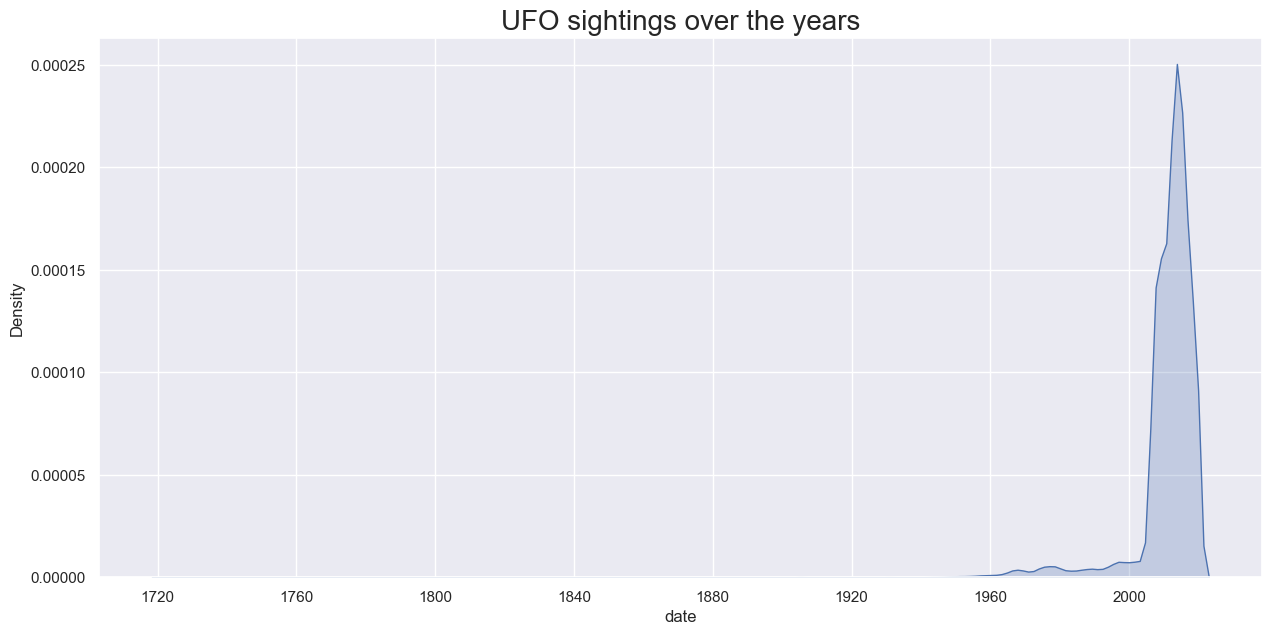

In [17]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 7))

# plt.xlim(pd.to_datetime("19900101"), pd.to_datetime("20200101"))

fig = sns.kdeplot(
    data=df_mod,
    x='date',
    fill=True
)
plt.title(
    'UFO sightings over the years',
    fontdict={
        'fontsize': 20
    }
)

In [18]:
df_mod.sort_values(by=['date'], ascending=True).head(5)

summary  \
78812  Two white dots at high altitude traveling very...   
34     Reported in a London paper in 1762: a bright l...   
72347  ((HOAX))  FROM CAPT BLIGH LOG ON THE BOUNTY  S...   
4860     Slow Moving Fireball, stench of burning sulpher   
29417        UFO report communicated by Thomas Jefferson   

                                            city state     shape  \
78812                                     Dallas    GA   unknown   
34     Lulworth, Dorsetshire (near) (UK/England)   NaN       NaN   
72347                          Bounty (the ship)   NaN       NaN   
4860                                    Carlisle    NY  fireball   
29417                                Baton Rouge    LA     light   

                 duration  city_latitude  city_longitude       date  month  \
78812         1-2 minutes      33.912210      -84.880048 1721-04-25    4.0   
34              >1 minute            NaN             NaN 1762-12-11   12.0   
72347                 NaN            NaN             NaN 1788-05-04    5.0   
4860   less than 1 minute            NaN             NaN 1790-06-30    6.0   
29417          15 seconds      30.427367      -91.086956 1800-04-05    4.0   

         year  
78812  1721.0  
34     1762.0  
72347  1788.0  
4860   1790.0  
29417  1800.0

###### <center>It seems that the earliest recorded UFO sightings<br>have been from the beginning of the 18th century.<br> **We even have a record of Thomas Jefferson**. <br> Most recorded UFO sightings<br>have been recorded after the year 2000 </center>
<hr>

#### <center> State Visualization </center>

###### <center> [Seaborn Color Palettes](https://www.practicalpythonfordatascience.com/ap_seaborn_palette) </center>
###### <center> [MORE Color Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) </center> <br><br>

<Axes: xlabel='count', ylabel='state'>

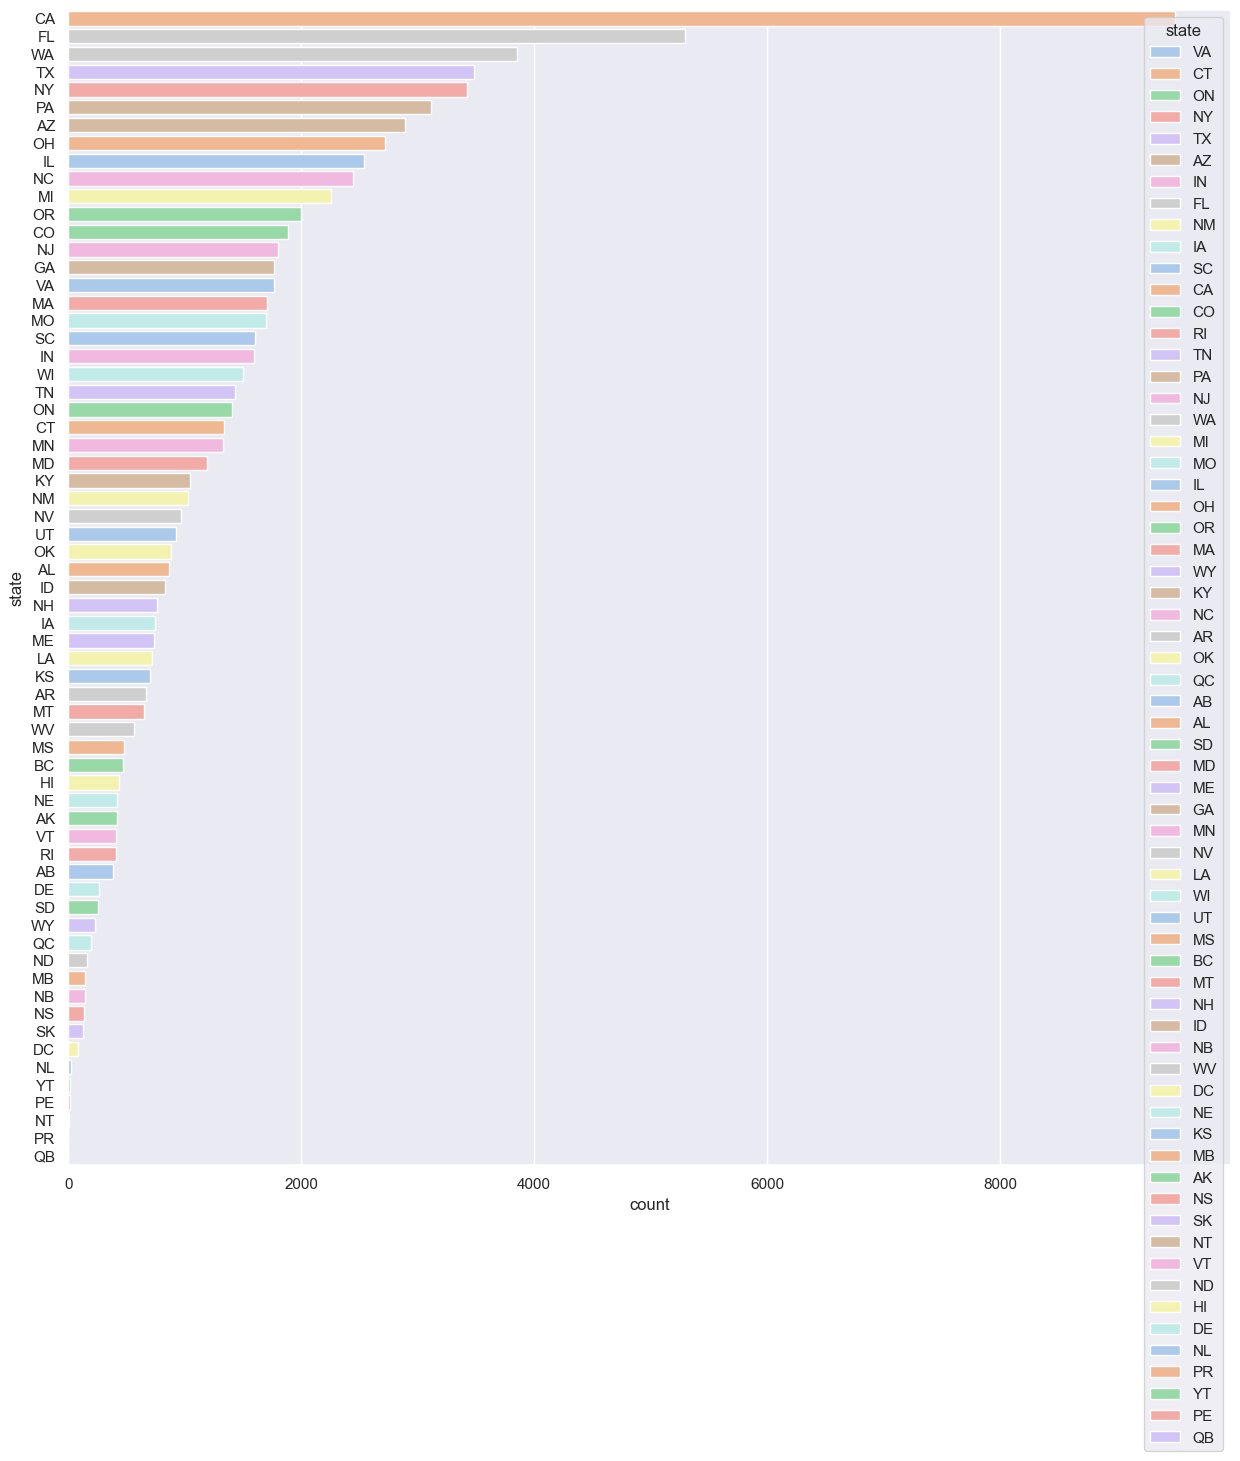

In [19]:
plt.figure(figsize=(15, 15))
sns.countplot(
    data=df_mod,
    y='state',
    order=df['state'].value_counts().index,
    hue = 'state',
    palette = "pastel"
)


#### <center> It seems that by far the most UFO sightings<br>happen in California, it would be interesting<br> for us to find out if this has always<br> been the case over the years or<br> if this is a recent development</center>

   state  count
6     CA   9506
11    FL   5294
60    WA   3856
56    TX   3481
41    NY   3425
46    PA   3115
4     AZ   2893
42    OH   2723
16    IL   2539
31    NC   2442


Text(0.5, 1.0, 'UFO sightings over the years by state')

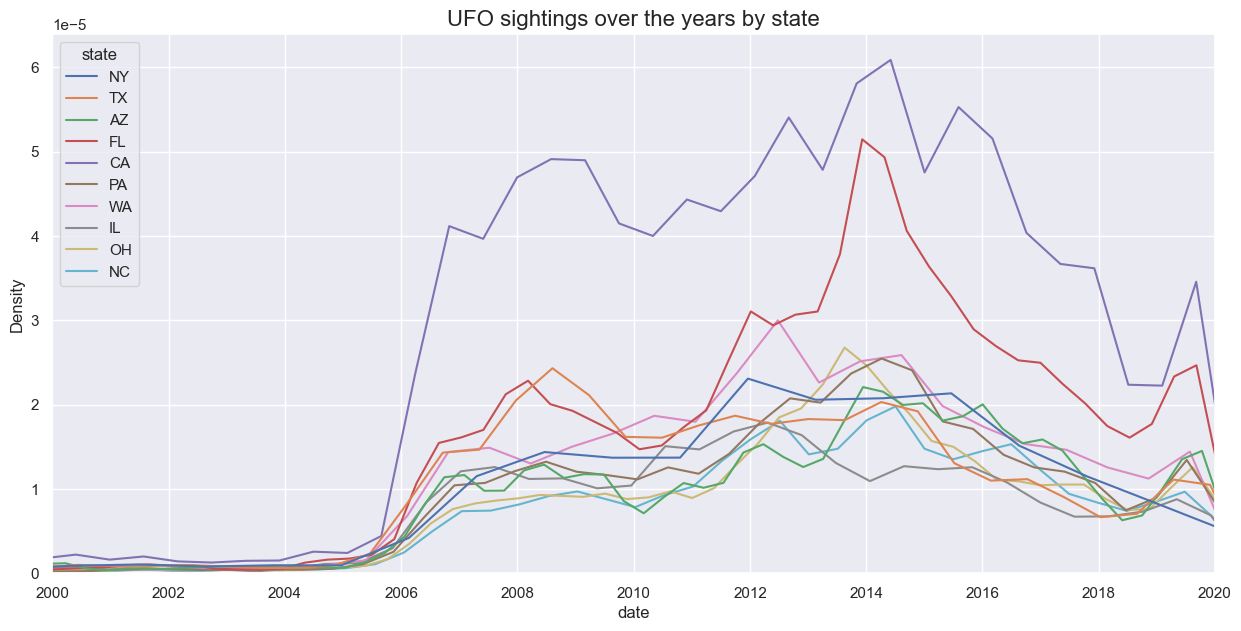

In [20]:
state_list = df_mod.groupby('state')['state'].count().reset_index(name='count').nlargest(10, columns=['count'])
print(state_list)

plt.figure(figsize=(15, 7))
plt.xlim(pd.to_datetime("20000101", format='%Y%m%d'), pd.to_datetime("20200101", format='%Y%m%d'))

sns.kdeplot(
    data=df_mod[df['state'].isin(state_list['state'])],
    x='date',
    hue='state',
    bw_adjust=0.2,   # smoothing
)

plt.title(
    'UFO sightings over the years by state',
    fontdict={
        'fontsize': 16
    }
)

In [21]:
UFO_Yearly_Count = df_mod['year'].value_counts().sort_index()
print(UFO_Yearly_Count.tail(21))

year
1999.0     218
2000.0     240
2001.0     266
2002.0     225
2003.0     243
2004.0     341
2005.0     559
2006.0    3726
2007.0    4738
2008.0    5310
2009.0    4995
2010.0    4783
2011.0    5635
2012.0    8123
2013.0    7831
2014.0    8696
2015.0    6909
2016.0    5673
2017.0    5069
2018.0    3285
2019.0    5839
Name: count, dtype: int64


<br>Several smartphones with photograph capabilities were introduced<br>between 2003 and 2007. Here are some notable examples:<br>

2003<br>
Sony Ericsson P800: One of the early smartphones with a built-in camera,<br> running on the Symbian OS.<br>
Nokia 3650: Featured a VGA camera and was one of the first smartphones<br> to gain popularity with its unique circular keypad design.<br><hr>
2004<br>
Motorola Razr V3: Though primarily known for its design, it included a VGA camera.<br>
PalmOne Treo 600: Combined PDA functionality with a camera and was popular<br> among business users.<br><hr>
2005<br>
Nokia N70: Part of the Nokia Nseries, it featured a 2 MP camera and ran<br> on the Symbian OS.<br>
Sony Ericsson K750i: Came with a 2 MP camera and autofocus, which was quite advanced for its time.<br><hr>
2006<br>
BlackBerry Pearl 8100: BlackBerry's first device with a camera, featuring a 1.3 MP camera.<br>
Nokia N93: Known for its high-quality 3.2 MP camera with Carl Zeiss optics, capable of video recording.<br><hr>
2007
Apple iPhone: Introduced in January and released in June, it featured a 2 MP camera<br> and revolutionized the smartphone industry.<br>
Nokia N95: Featured a 5 MP camera with Carl Zeiss optics and was highly praised for<br> its camera capabilities.<br><hr>

These devices played a significant role in making mobile photography<br>more accessible to the general public, contributing to the increase in<br> captured and shared images, including UFO sightings.

# <center>**The <br> SIGHTINGS <br> Were Alway There**</center>
<hr>

#### <center> UFO Shape Visualization </center>

Text(0.5, 1.0, 'UFO sightings by shape')

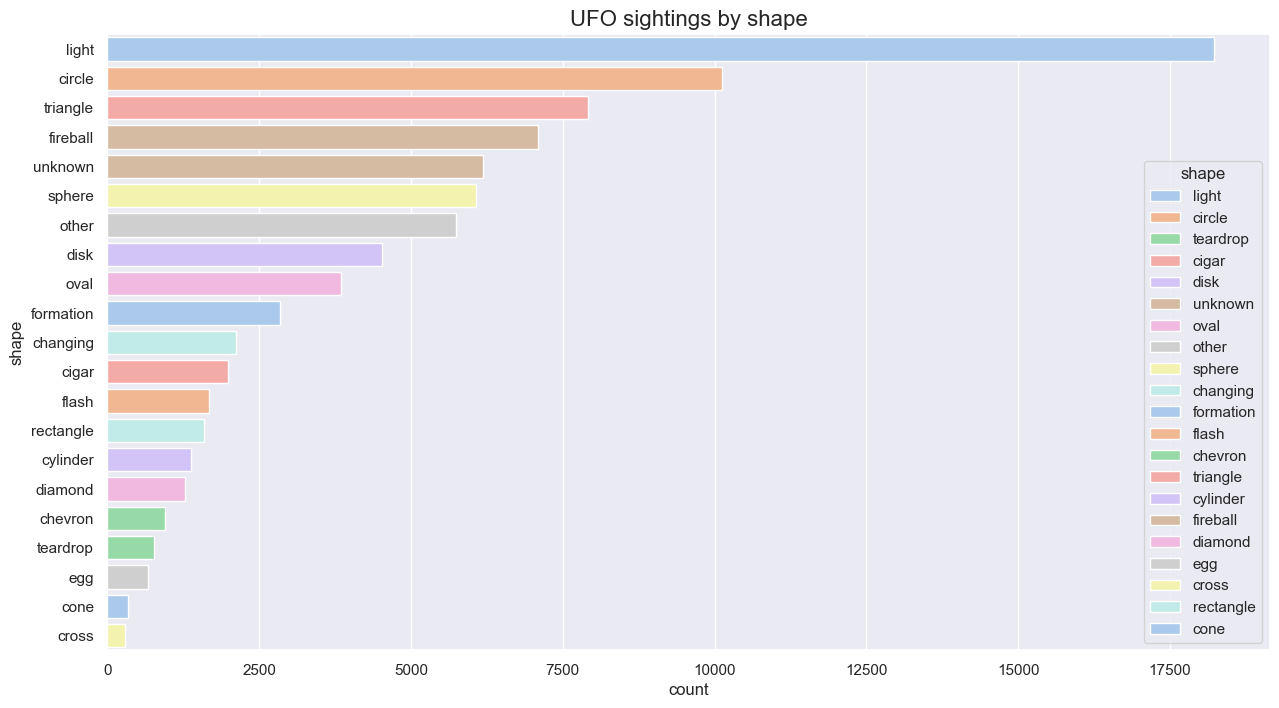

In [22]:
plt.figure(figsize=(15, 8))

sns.countplot(
    data=df,
    y='shape',
    order=df['shape'].value_counts().index,
    hue = 'shape',
    palette = "pastel"
)

plt.title(
    'UFO sightings by shape',
    fontdict={
        'fontsize': 16
    }
)

        shape  count
13      light  18230
3      circle  10130
19   triangle   7910
10   fireball   7095
20    unknown   6182
17     sphere   6065
14      other   5749
8        disk   4522
15       oval   3857
12  formation   2842


Text(0.5, 1.0, 'UFO sightings over the years by shape')

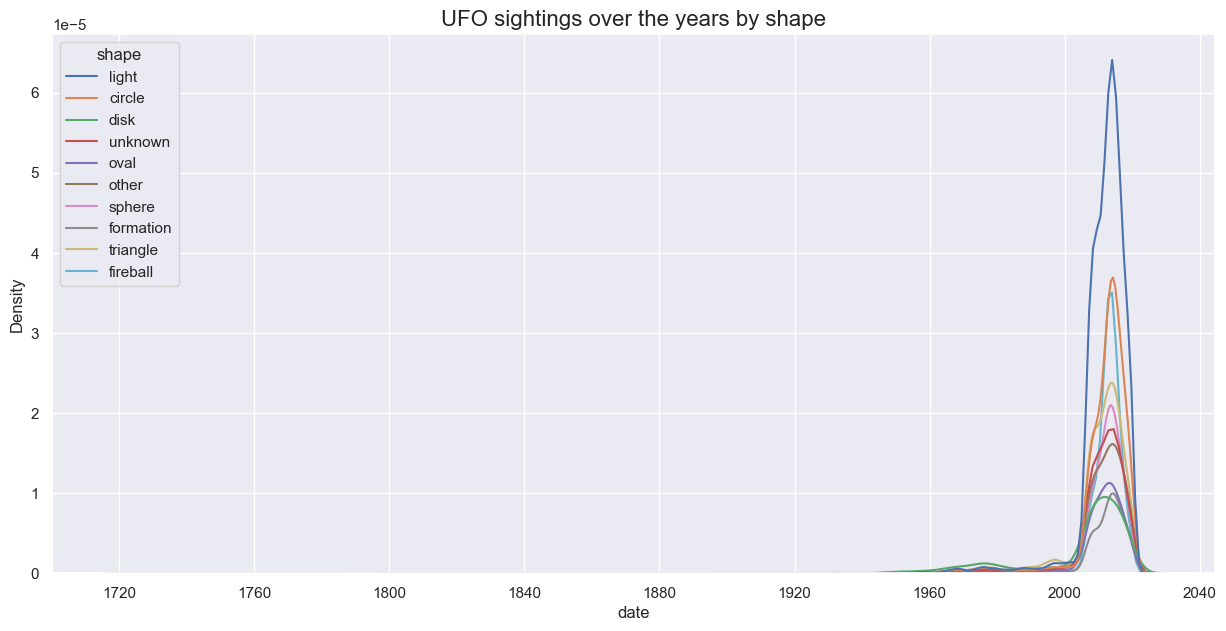

In [23]:
shape_list = df_mod.groupby('shape')['shape'].count().reset_index(name='count').nlargest(10, columns=['count'])
print(shape_list)

df_shape_list = df_mod[df_mod['shape'].isin(shape_list['shape'])]

plt.figure(figsize=(15, 7))

sns.kdeplot(
    # data=df_mod[df_mod['shape'].isin(shape_list['shape'])],
    data = df_shape_list,
    x='date',
    hue='shape'
)

plt.title(
    'UFO sightings over the years by shape',
    fontdict={
        'fontsize': 16
    }
)


It seems that most of the recorded UFO sightings consisted of a light and a circle shaped object.

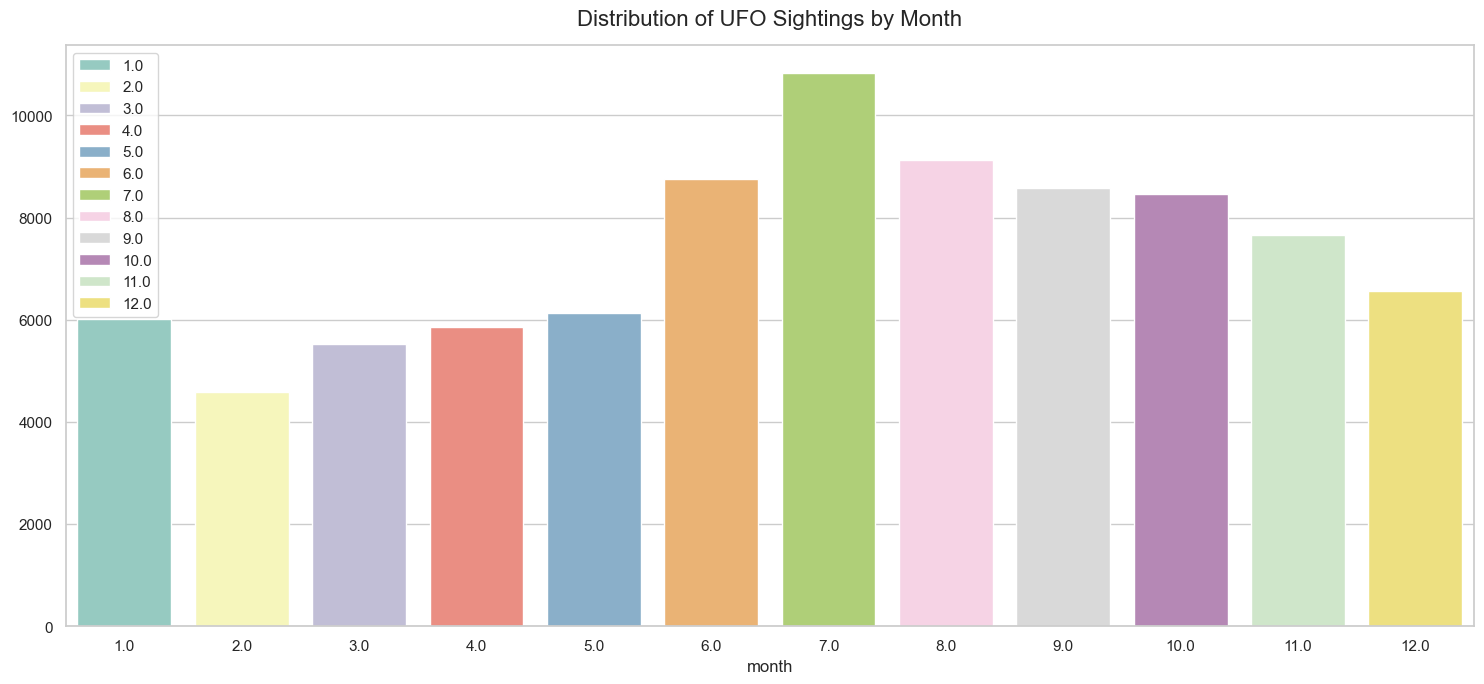

In [24]:
# Set Seaborn style and color palette
sns.set(style="whitegrid", palette="viridis")


# Extract and analyze the distribution of sightings over different months
monthly_counts = df_mod['month'].value_counts().sort_index()

# Plot the temporal distributions using Seaborn with rotated x-axis labels
# fig, axes = plt.subplots(3, 1, figsize=(15, 12))

plt.figure(figsize=(15, 7))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, hue= monthly_counts.index, palette = "Set3") #, ax=axes[1])
# axes[1].set_title('Monthly Distribution of Sightings')
# axes[1].set_ylabel('Number of Sightings')


# Rotate x-axis labels for better readability
# for ax in axes:
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add a title for the entire plot

# plt.suptitle('Temporal Distribution of UFO Sightings', y=1.02, fontsize=16)
plt.title('Distribution of UFO Sightings by Month', y=1.02, fontsize=16)

plt.tight_layout()
plt.legend(loc = 0)
plt.show()


### <center> Convert Numeric Month (1, 2, 3...)<br>to Text (Jan, Feb, Mar...) <center>

In [25]:
df_mod.columns

Index(['summary', 'city', 'state', 'shape', 'duration', 'city_latitude',
       'city_longitude', 'date', 'month', 'year'],
      dtype='object')

In [26]:
# df_mod.to_csv('df_mod')

In [27]:
print(df_mod.columns, '\n')

month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

df_mod['month_name'] = df_mod['month'].map(month_map)

print(df_mod.columns)

Index(['summary', 'city', 'state', 'shape', 'duration', 'city_latitude',
       'city_longitude', 'date', 'month', 'year'],
      dtype='object') 

Index(['summary', 'city', 'state', 'shape', 'duration', 'city_latitude',
       'city_longitude', 'date', 'month', 'year', 'month_name'],
      dtype='object')


#### <center> Interactive maps </center>

###### <center>Create a temporary dataframe with no missing values</center>

In [28]:
df_temp = df_mod.copy()
df_temp = df_temp.dropna(subset=['date'])
df_temp['year'] = pd.DatetimeIndex(df_temp['date']).year

In [29]:
print(df_temp.columns)
print(df_temp.head(2))

Index(['summary', 'city', 'state', 'shape', 'duration', 'city_latitude',
       'city_longitude', 'date', 'month', 'year', 'month_name'],
      dtype='object')
                                             summary        city state  \
0  My wife was driving southeast on a fairly popu...     Chester    VA   
1  I think that I may caught a UFO on the NBC Nig...  Rocky Hill    CT   

    shape     duration  city_latitude  city_longitude       date  month  year  \
0   light    5 seconds      37.343152      -77.408582 2019-12-12   12.0  2019   
1  circle  3-5 seconds      41.664800      -72.639300 2019-03-22    3.0  2019   

  month_name  
0        Dec  
1        Mar  


Index(['summary', 'city', 'state', 'shape', 'duration', 'city_latitude',
       'city_longitude', 'date', 'month', 'year', 'month_name'],
      dtype='object')


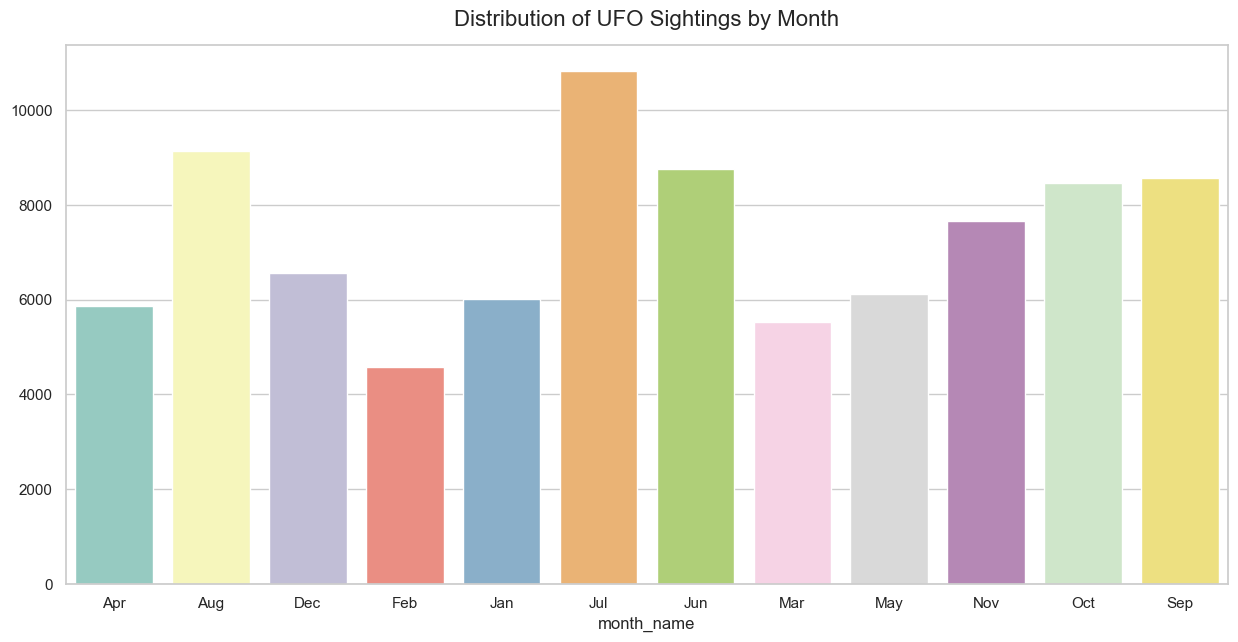

In [30]:
print(df_temp.columns)

sns.set(style="whitegrid", palette="viridis")

monthly_counts = df_temp['month_name'].value_counts().sort_index()

plt.figure(figsize=(15, 7))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, hue= monthly_counts.index, palette = "Set3") #, ax=axes[1])

plt.title('Distribution of UFO Sightings by Month', y=1.02, fontsize=16)

# plt.tight_layout()
plt.show()

In [31]:
fig = px.choropleth(
    df_temp.groupby(['state'])['state'].count().reset_index(name='Sightings'),
    locations='state',
    color='Sightings',
    color_continuous_scale='aggrnyl',
    locationmode = 'USA-states',
    height=700
)

fig.update_layout(
    title_text = 'Total UFO sightings by state',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

The Above graph shows us the total amount of UFO sightings by state, from the year 1721 to 2019. This clearly shows that most UFO recordings take place in California

In [32]:
df_temp = df_temp.dropna(subset=['city_latitude', 'city_longitude'])
fig = px.scatter_geo(
    df_temp.sort_values(by=['year'],ascending=True),
    lat='city_latitude',
    lon='city_longitude',
    locationmode='USA-states',
    scope="usa",
    animation_frame="year",
    animation_group='state',
    height=700
)

fig.update_layout(
    title_text='Recorded UFOs for a Given Year (not cummulative)',
)

fig.show()

The above graph shows us the exact location of the recorded UFO sightings per year. The graph paints a picture of the massive increase in sightings since the year 2000

### Wordcloud

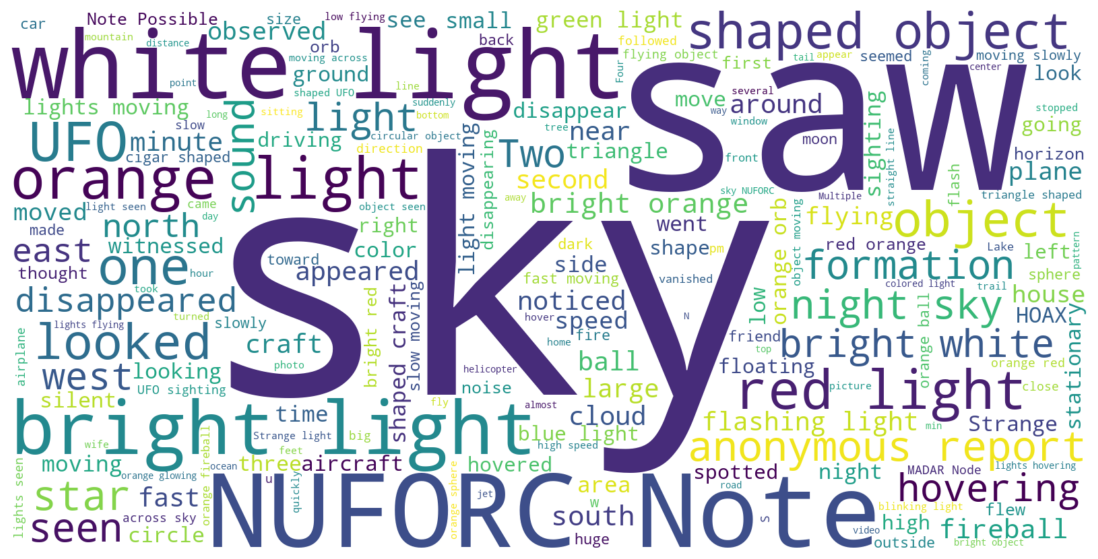

In [33]:
text = " ".join(df_mod['summary'])
wordcloud = WordCloud(
    background_color="white",
    width=1600, 
    height=800,
    # stopwords = STOPWORDS.update(["NUFORC", "Note"])
    stopwords= STOPWORDS
).generate(text)


plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# print(len(STOPWORDS))     # ther are 192 STOPWORDS

# <center>The Above WORDCLOUD<br>Paints a Picture<br>of the Summary<br>of ALL the Recorded<br>UFO Sightings in the USA.<br>(Nearly 90,000 Sightings)</center>

In [34]:
# df.info